In [1]:
!pip install sounddevice

In [2]:
import math
import random
import numpy as np
import pandas as pd
import sounddevice as sd
import matplotlib.pyplot as plt

# 2. Gradiente Descendiente

Se crea el algoritmo del Gradiente Descendiente, en una función, modificando un poco la del ejemplo del punto 2.

In [3]:
def y_predict(a, b, c, d, x):
    return a * np.sin(b * x + c) + d

def gradient_descent(x, y, lr, batch, epochs):
    n = len(x)
    rsl = []
    a = random.random()
    b = random.random()
    c = random.random()
    d = 0
    
    for epoch in epochs:
        for i in range(epoch):
            a_gradiente = 0
            b_gradiente = 0
            c_gradiente = 0
            d_gradiente = 0
            e = 0

            for _ in range(batch):
                ix = int(random.uniform(0, n))
                y_pred = y_predict(a, b, c, d, x[ix])
                error = y[ix] - y_pred

                e += error**2
                a_gradiente += 2 * error * np.sin(b * x[ix] + c)
                b_gradiente += 2 * error * a * np.cos(b * x[ix] + c) * x[ix]
                c_gradiente += 2 * error * a * np.cos(b * x[ix] + c)
                d_gradiente += 2 * error

            a -= lr * a_gradiente / batch
            b -= lr * b_gradiente / batch
            c -= lr * c_gradiente / batch

            e /= batch
            rsl.append([a, b, c, e])
            print(f"Amplitude: {a}, Period: {b}, Constant: {c}, Error: {e}")

    return rsl, a, b, c

Se cargan los datos

In [4]:
data = pd.read_csv('data/senal.csv')

Se asignan los valores de las variables X, Y

In [5]:
x = data['x'].values
y = data['y'].values

Se parametrizan los parametros del algoritmo de gradiente descendente

In [6]:
lr = 0.01
batch = 500
epochs = [1000, 2000]

Se aplica el algoritmo de gradiente descendente

In [7]:
resultados, a, b, c = gradient_descent(x, y, lr, batch, epochs)

Amplitude: 0.22756541516063739, Period: 0.39606480258667426, Constant: 0.7492356333047441, Error: 4.362156532681024
Amplitude: 0.23953638812644443, Period: 0.39750067739823153, Constant: 0.7497728566591596, Error: 4.254269417572978
Amplitude: 0.2516890161547158, Period: 0.39896525532151367, Constant: 0.7503126196778119, Error: 4.227409606968473
Amplitude: 0.2634885520511328, Period: 0.40057222465936504, Constant: 0.7509270754303108, Error: 4.230503866756296
Amplitude: 0.2767693016694342, Period: 0.40218547964454554, Constant: 0.7515434618974581, Error: 4.2152037331607035
Amplitude: 0.2844966393268434, Period: 0.40363338587824, Constant: 0.7519046252118152, Error: 4.069078498736942
Amplitude: 0.29574595760040895, Period: 0.4053743350388738, Constant: 0.7525045101788559, Error: 4.353181145667952
Amplitude: 0.30955293087608315, Period: 0.4071525761346831, Constant: 0.7532171254544188, Error: 4.151739396037702
Amplitude: 0.31844947076073016, Period: 0.4086936449206904, Constant: 0.75355582

Amplitude: 2.5981374090568825, Period: 0.4723787985552018, Constant: 0.8023772211566987, Error: 11.763991219874821
Amplitude: 2.656636997264081, Period: 0.468452507093207, Constant: 0.8046770769182813, Error: 12.867415025082057
Amplitude: 2.7131534615848083, Period: 0.46840098766847654, Constant: 0.8097245643206912, Error: 12.441614685471455
Amplitude: 2.7705223237176213, Period: 0.46574003916699647, Constant: 0.8135392585458228, Error: 12.660998634312563
Amplitude: 2.828725523962729, Period: 0.4618273057557064, Constant: 0.8163652318206133, Error: 13.2352249877786
Amplitude: 2.884548344249139, Period: 0.46098740965091656, Constant: 0.8217939367884932, Error: 12.478285562474765
Amplitude: 2.945886431753938, Period: 0.4573699718993454, Constant: 0.8260727609149773, Error: 13.910414783938583
Amplitude: 3.011375681885595, Period: 0.45413063271808557, Constant: 0.8306776262183448, Error: 15.282474893021794
Amplitude: 3.074184847706639, Period: 0.4506205666054724, Constant: 0.83581304885714

Amplitude: 12.629668734153066, Period: 2.4777247918562124, Constant: 0.5971948256716455, Error: 94.38035240076056
Amplitude: 12.708683817134661, Period: 2.0934369809809423, Constant: 0.37903744502254466, Error: 39.37448451810158
Amplitude: 12.834717590362073, Period: 1.386448620744544, Constant: -0.09757288937232922, Error: 77.89280496577989
Amplitude: 12.986337646743403, Period: 0.7141464509565331, Constant: -0.36350724113874333, Error: 107.18686821736736
Amplitude: 13.114252395594393, Period: 2.7604879267093865, Constant: 0.8881353006376839, Error: 89.67059157298549
Amplitude: 13.212368484795162, Period: 3.5012910943158695, Constant: 1.3336364398874627, Error: 53.753371882673775
Amplitude: 13.349743211575532, Period: 4.04135443100045, Constant: 1.7459754052413237, Error: 104.3379458934227
Amplitude: 13.517461953085387, Period: 3.87409133491685, Constant: 1.6490599377605564, Error: 132.3646408952503
Amplitude: 13.691673488075594, Period: 4.0984893162358675, Constant: 1.799469663594228

Amplitude: 31.094211641164964, Period: -10.01733493810214, Constant: -10.122247637903456, Error: 453.0293334594874
Amplitude: 31.410868808689777, Period: -10.51191642210929, Constant: -10.532851822529745, Error: 494.4990081544855
Amplitude: 31.71522175207943, Period: -9.8977793759197, Constant: -10.077773951348142, Error: 477.65917787550796
Amplitude: 32.021413581068586, Period: -9.693512550744133, Constant: -10.033407513177915, Error: 488.3464526635919
Amplitude: 32.371975255256885, Period: -8.2415858825816, Constant: -9.610995944970758, Error: 569.2515268092424
Amplitude: 32.68717127701672, Period: -8.916682247167623, Constant: -9.842341359176329, Error: 507.0920095969266
Amplitude: 33.01229438875346, Period: -9.081894436738809, Constant: -10.079919653733311, Error: 525.0390019169308
Amplitude: 33.34283796422843, Period: -10.569503176910896, Constant: -10.646982012942688, Error: 544.806682214195
Amplitude: 33.687561788096616, Period: -9.571784452257154, Constant: -10.043309335781464,

Amplitude: 75.55635327036501, Period: 22.786479886535112, Constant: 11.03291549911677, Error: 2831.7234313514223
Amplitude: 76.35687524086636, Period: 26.22614838217168, Constant: 14.277319166431937, Error: 3025.670424720917
Amplitude: 77.1250148654441, Period: 25.230501347096197, Constant: 13.34320984506168, Error: 2940.384809380318
Amplitude: 77.93980137855608, Period: 27.94947464140304, Constant: 15.425418094216418, Error: 3149.7913648921162
Amplitude: 78.69071016640358, Period: 29.377606608665943, Constant: 16.285191002964435, Error: 2930.022595161493
Amplitude: 79.51409926053374, Period: 31.50079621802824, Constant: 17.542752081200362, Error: 3239.655409646635
Amplitude: 80.29026205984044, Period: 32.611306889491885, Constant: 18.013294246573356, Error: 3084.184843828327
Amplitude: 81.09810312276943, Period: 32.51615357101427, Constant: 18.418652728087228, Error: 3248.4174035755973
Amplitude: 81.9564009968064, Period: 35.380416020532984, Constant: 19.45447572113645, Error: 3480.40

Amplitude: 191.0907183961648, Period: 144.70010038035582, Constant: 134.04094397869505, Error: 17837.219645251454
Amplitude: 192.95007027000608, Period: 152.60966136232028, Constant: 134.02832785559397, Error: 17763.234645549543
Amplitude: 194.96241187402464, Period: 158.80534974902153, Constant: 137.32983855158136, Error: 19417.065908034125
Amplitude: 196.85178954637766, Period: 151.9131436012647, Constant: 138.34222137865734, Error: 18408.498965335464
Amplitude: 198.8795625842567, Period: 172.05102435727557, Constant: 151.78420318969685, Error: 19953.974698899357
Amplitude: 200.95075258128375, Period: 166.01624642063035, Constant: 147.94655585073065, Error: 20605.533835260998
Amplitude: 202.91888761705093, Period: 169.28224182256554, Constant: 150.47866797632508, Error: 19797.508295751195
Amplitude: 205.0414189537924, Period: 202.25871239822516, Constant: 172.7918042809881, Error: 21552.29353629185
Amplitude: 207.1808152225361, Period: 219.581927289257, Constant: 183.3837577508674, E

Amplitude: 480.2836220650602, Period: 859.1869826839473, Constant: 170.0649449647792, Error: 107859.61781804492
Amplitude: 485.2950378841569, Period: 788.466340704966, Constant: 96.94692721498791, Error: 120353.72070998052
Amplitude: 489.9156897371259, Period: 858.7827440026517, Constant: 150.0489366912997, Error: 112141.6382325401
Amplitude: 494.62521139392476, Period: 812.9349326939325, Constant: 175.1202119049295, Error: 115335.51580752936
Amplitude: 499.4571783241576, Period: 813.2479125038312, Constant: 150.72525506264031, Error: 119504.08067051262
Amplitude: 504.162099589003, Period: 491.40980950868084, Constant: -9.822251914200933, Error: 117517.34679207049
Amplitude: 509.3784396334563, Period: 711.3996865088216, Constant: 118.49986754940389, Error: 131499.10123116281
Amplitude: 514.554402572516, Period: 817.135274830461, Constant: 160.54302821069123, Error: 131816.33738194665
Amplitude: 519.8757349625597, Period: 763.2309837097965, Constant: 95.02901303708313, Error: 136885.448

Amplitude: 1156.7246426839451, Period: 2314.494399274565, Constant: 878.9833879914163, Error: 643697.4676660356
Amplitude: 1168.0437332642268, Period: 2207.6883007516867, Constant: 774.1357104866082, Error: 654594.9159525324
Amplitude: 1180.4299790906603, Period: 2392.396711819586, Constant: 945.5385966614385, Error: 723382.9560357499
Amplitude: 1192.3619017922513, Period: 2113.2475230001874, Constant: 764.5829829752598, Error: 704257.1079774911
Amplitude: 1204.2186595560179, Period: 3209.173805485405, Constant: 1323.3016894099885, Error: 706902.7745963217
Amplitude: 1215.7456643399732, Period: 2849.708770774721, Constant: 1262.4765860588782, Error: 694109.1357188041
Amplitude: 1228.297835529631, Period: 2424.1840788550307, Constant: 890.5641506317056, Error: 762942.421555653
Amplitude: 1240.6716001224897, Period: 1657.4544247132412, Constant: 183.3267099741979, Error: 759922.8641379046
Amplitude: 1253.3427393274196, Period: 2534.4116350885156, Constant: 618.5132558314408, Error: 78598

Amplitude: 2651.1717629805144, Period: -27115.728329049474, Constant: -13824.537014082052, Error: 3442432.724430654
Amplitude: 2678.3283980381298, Period: -25942.991875269763, Constant: -13483.90245520939, Error: 3599806.2806303753
Amplitude: 2705.0490994814795, Period: -26609.771853747083, Constant: -13296.01682680051, Error: 3578406.418839991
Amplitude: 2732.5285809604447, Period: -29085.005398764468, Constant: -14319.551526707432, Error: 3716797.273798529
Amplitude: 2760.2778468354604, Period: -26859.919375765654, Constant: -12557.669222827884, Error: 3791412.854645625
Amplitude: 2786.5087344100193, Period: -23175.266112350615, Constant: -10485.89996434847, Error: 3620220.2632691767
Amplitude: 2813.895112885011, Period: -17953.239871631376, Constant: -7036.205903562436, Error: 3815474.8313113297
Amplitude: 2843.124833836396, Period: -18110.14676897181, Constant: -6803.970004480223, Error: 4112325.185998328
Amplitude: 2872.46942939859, Period: -11521.863794253608, Constant: -3313.245

Amplitude: 6440.117786836531, Period: -81768.70340780643, Constant: -59725.0082302548, Error: 20904962.002960846
Amplitude: 6500.025953875817, Period: -108254.19420043916, Constant: -75883.18896444989, Error: 19290426.10365988
Amplitude: 6565.323043864379, Period: -162163.30264019186, Constant: -109335.71089129813, Error: 21221637.549415123
Amplitude: 6631.130880069528, Period: -197114.68728848378, Constant: -125897.77485927523, Error: 21602735.80064095
Amplitude: 6699.7568878564925, Period: -209755.1851864557, Constant: -130871.5480248472, Error: 22753153.982893113
Amplitude: 6765.770239604032, Period: -194945.49423767466, Constant: -120813.51150747896, Error: 22113971.204866715
Amplitude: 6831.469203025621, Period: -135700.16027181727, Constant: -89831.6295749042, Error: 22225584.816001087
Amplitude: 6896.364750447, Period: -93449.13116396836, Constant: -60706.73175634483, Error: 22167185.394471586
Amplitude: 6964.731710779427, Period: -88462.34709928528, Constant: -51711.59865467536

Amplitude: 15703.124120288212, Period: 344729.18006605224, Constant: 146986.2751992133, Error: 122232975.74982898
Amplitude: 15858.007982416799, Period: 341775.2847016699, Constant: 168176.42292828776, Error: 121608006.4053452
Amplitude: 16006.88706616017, Period: 297513.45276761387, Constant: 163198.07193290975, Error: 118044323.85183518
Amplitude: 16162.703702453016, Period: 259013.75538350316, Constant: 146553.71273133438, Error: 124706057.54842079
Amplitude: 16330.74568290677, Period: 270508.089572877, Constant: 130916.04888391338, Error: 135799406.18814245
Amplitude: 16491.42955104201, Period: 336788.2970323997, Constant: 194307.74065173214, Error: 131203132.40277204
Amplitude: 16659.0725700152, Period: 369181.59927824663, Constant: 202167.62532856874, Error: 138232730.17130977
Amplitude: 16819.83844582596, Period: 404556.4840470518, Constant: 215796.01580377918, Error: 133909323.91120766
Amplitude: 16985.671099341416, Period: 456907.40773025516, Constant: 294222.0373600037, Error

Amplitude: 39184.10616677141, Period: -7194346.152668095, Constant: -4657897.774931607, Error: 781600515.2732581
Amplitude: 39551.81134593908, Period: -6835559.49180509, Constant: -4598384.886856542, Error: 720410152.0978454
Amplitude: 39952.03530251541, Period: -6943216.1200790955, Constant: -4602512.099018547, Error: 791478198.1786075
Amplitude: 40356.35740054455, Period: -7631510.526539609, Constant: -4940156.804388044, Error: 807672481.0851679
Amplitude: 40763.932169806896, Period: -6758226.0718727, Constant: -4437770.909647991, Error: 822412370.6870086
Amplitude: 41169.62564452901, Period: -6418587.263040397, Constant: -3940100.5347251496, Error: 826885489.4573575
Amplitude: 41572.3554222073, Period: -6828439.766483458, Constant: -4301221.439708097, Error: 829011749.5170577
Amplitude: 42012.90663904341, Period: -6429129.560153477, Constant: -4078009.315321147, Error: 915728279.7468336
Amplitude: 42445.917899778964, Period: -5715859.619893475, Constant: -3666789.98320429, Error: 90

Amplitude: 93312.78058740697, Period: -51552053.78545778, Constant: -28586203.223579906, Error: 4335484835.201216
Amplitude: 94217.0167023728, Period: -53410950.46191441, Constant: -30374897.673243333, Error: 4218836330.7337627
Amplitude: 95121.4696679203, Period: -52746457.58036741, Constant: -30307280.519045375, Error: 4260745369.382726
Amplitude: 95996.7643624356, Period: -58558588.52514681, Constant: -34470868.412516765, Error: 4162956255.9974995
Amplitude: 97027.40276941448, Period: -50635889.263504066, Constant: -30173564.664781727, Error: 4946900984.5244875
Amplitude: 97973.83277995506, Period: -48484870.42465559, Constant: -29229048.51440995, Error: 4591488435.12899
Amplitude: 98912.59345686306, Period: -54677379.980556116, Constant: -34072952.5816456, Error: 4598683522.3780775
Amplitude: 99915.78673760006, Period: -55233900.30902426, Constant: -34652382.002986826, Error: 4961424602.661777
Amplitude: 100921.59637457636, Period: -64974729.83957279, Constant: -40866714.08758428, 

Amplitude: 225541.10987459953, Period: -164577178.40779734, Constant: -152560745.14855012, Error: 23464283136.238873
Amplitude: 227768.94198333248, Period: -137609856.7576689, Constant: -137350961.8777914, Error: 25123379414.78125
Amplitude: 230075.00171412085, Period: -99408835.34398517, Constant: -115204439.24497314, Error: 26262453191.883198
Amplitude: 232427.51521077997, Period: -48287115.25514983, Constant: -94460900.69433017, Error: 27062712894.574547
Amplitude: 234839.01566281758, Period: -12049922.598122872, Constant: -78638495.19956094, Error: 28024938118.895256
Amplitude: 236899.57093445488, Period: 10026402.17260078, Constant: -61680153.40030396, Error: 24194944824.098152
Amplitude: 239325.68838380236, Period: 68986645.01782903, Constant: -21536068.480700925, Error: 28737286358.28537
Amplitude: 241659.1554544403, Period: 115838783.59482242, Constant: 6594897.001302216, Error: 27922909733.113277
Amplitude: 244159.29749891226, Period: 147928190.80160874, Constant: 21793454.124

Amplitude: 493185.568593306, Period: -202604925.28989938, Constant: -285177923.60320663, Error: 113035959765.54988
Amplitude: 498027.0532208953, Period: -273623559.5673963, Constant: -380509833.1139762, Error: 119387561229.5276
Amplitude: 503151.2884060345, Period: -106593959.01486921, Constant: -312455235.5803252, Error: 127600342916.45432
Amplitude: 507819.8251089917, Period: -374968792.81819487, Constant: -468724599.79604983, Error: 117449023766.83685
Amplitude: 512899.2792820977, Period: -426094809.7649173, Constant: -483748686.99842376, Error: 128972374616.84464
Amplitude: 518174.1555255044, Period: -506879426.2250346, Constant: -535455019.2278074, Error: 135274029548.64389
Amplitude: 523405.23548340256, Period: -448499786.02704924, Constant: -457918938.527699, Error: 135530552321.15892
Amplitude: 528611.4924298781, Period: -302920593.2470362, Constant: -352416664.7396351, Error: 136249129285.23557
Amplitude: 533972.8886715324, Period: -409275319.33998203, Constant: -369399892.107

Amplitude: 1211902.089777311, Period: 3074454145.465141, Constant: 1618337626.2103422, Error: 755781457603.9666
Amplitude: 1224117.562034824, Period: 4227673551.0180836, Constant: 2396266397.582973, Error: 740197972520.7715
Amplitude: 1236417.0839975982, Period: 4884251505.754011, Constant: 2773245502.260729, Error: 752802948764.3319
Amplitude: 1248925.408381111, Period: 5229733184.175086, Constant: 2913291561.96891, Error: 773275233143.7367
Amplitude: 1260591.898876638, Period: 6700977376.258652, Constant: 3803691852.807493, Error: 728528807984.2289
Amplitude: 1273476.986003592, Period: 9083384501.456455, Constant: 5017762833.807679, Error: 812141841437.0521
Amplitude: 1285913.6805946417, Period: 8909638213.758375, Constant: 5062889434.096861, Error: 791892173139.2294
Amplitude: 1298501.4104256406, Period: 10814629310.761877, Constant: 6271587948.353679, Error: 809336751866.8806
Amplitude: 1311992.053725541, Period: 9670434266.43855, Constant: 5758221586.314145, Error: 875881058842.92

Amplitude: 2656941.7529797927, Period: -13170695872.294601, Constant: -5544686624.110892, Error: 3551245931848.5063
Amplitude: 2682511.327206661, Period: -18760099375.728794, Constant: -8915589465.779654, Error: 3396843247728.1167
Amplitude: 2708204.265750149, Period: -20782804291.53333, Constant: -10027288619.79638, Error: 3446079808827.1567
Amplitude: 2736014.359384958, Period: -16799105437.297747, Constant: -7727284441.628511, Error: 3765770676871.7627
Amplitude: 2764335.153264771, Period: -12039178838.334267, Constant: -5051705509.153738, Error: 3874305187921.371
Amplitude: 2792432.728528629, Period: -13421282598.804682, Constant: -5991121631.626322, Error: 3883556032615.015
Amplitude: 2819791.438183165, Period: -16128080193.605042, Constant: -7728293909.888866, Error: 3819867802853.2944
Amplitude: 2847688.241388197, Period: -17731682470.77429, Constant: -8379431682.893105, Error: 3933158304210.0273
Amplitude: 2876870.822122321, Period: -14186490913.020454, Constant: -7164114353.56

Amplitude: 6918641.946641771, Period: 110114100696.19716, Constant: 82278851943.818, Error: 23108334969041.6
Amplitude: 6988265.090992013, Period: 120935782631.04802, Constant: 88376362540.58086, Error: 24084880278360.445
Amplitude: 7055228.729078011, Period: 86973551602.99129, Constant: 64918050471.169624, Error: 23397981875392.21
Amplitude: 7121187.980879116, Period: 127274285332.71277, Constant: 88767271967.28142, Error: 23267879708498.883
Amplitude: 7189294.971866386, Period: 81357281923.87935, Constant: 62642731072.304344, Error: 24250134848257.047
Amplitude: 7262830.45048539, Period: 66146088848.36896, Constant: 51937006414.521545, Error: 26433412708903.645
Amplitude: 7332122.301081363, Period: 32496787714.589737, Constant: 36476826375.54481, Error: 25162747422983.08
Amplitude: 7407481.377986366, Period: 88677012134.90024, Constant: 63182597777.183556, Error: 27627098177638.293
Amplitude: 7477908.632773702, Period: 122174124984.1777, Constant: 77585854244.00069, Error: 2608442970

Amplitude: 16889276.473464582, Period: -1017696642922.8112, Constant: -491740216595.23364, Error: 131883350491021.84
Amplitude: 17046739.516410094, Period: -922420098785.9127, Constant: -429833224939.09076, Error: 132971844079367.64
Amplitude: 17227492.344384886, Period: -870958170350.4915, Constant: -404800482289.77625, Error: 154062318107568.22
Amplitude: 17416081.879700653, Period: -873553838091.7543, Constant: -433692708174.18677, Error: 162446238315178.12
Amplitude: 17588959.839415886, Period: -930279193818.2244, Constant: -470270253343.667, Error: 150542835613480.53
Amplitude: 17762235.29706422, Period: -1048887644968.3235, Constant: -518074506765.0529, Error: 152386754095908.28
Amplitude: 17937950.278568666, Period: -1133733637641.9124, Constant: -591262123332.2067, Error: 156054542893752.72
Amplitude: 18112594.86138732, Period: -640139246297.4501, Constant: -515082834957.8946, Error: 156638292948854.16
Amplitude: 18309310.661072806, Period: -973179539219.5034, Constant: -720928

Amplitude: 37781719.236466534, Period: 3768406303305.5527, Constant: 2601880373564.8584, Error: 703284313198670.5
Amplitude: 38155436.0964712, Period: 5320683758292.943, Constant: 3547887786972.132, Error: 705983270562079.6
Amplitude: 38542811.199225, Period: 3959066598237.182, Constant: 2839409431644.0654, Error: 739023301006203.4
Amplitude: 38936573.12130329, Period: 3894765755555.448, Constant: 3053363796603.382, Error: 758834567239470.0
Amplitude: 39331378.56687299, Period: 3324235091295.908, Constant: 2612922882165.026, Error: 768618555106897.5
Amplitude: 39715174.34899807, Period: 2845822764218.8154, Constant: 2338111378951.0625, Error: 754760863158385.2
Amplitude: 40105010.64347383, Period: 2934973688182.7734, Constant: 2299852150812.8687, Error: 774120819829952.1
Amplitude: 40491305.093326464, Period: 3942922948504.381, Constant: 3185316037884.76, Error: 774617147636131.6
Amplitude: 40917655.91630505, Period: 4036424744370.9976, Constant: 3378040283007.3677, Error: 863175063723

Amplitude: 92967606.69696741, Period: 3331489165398.6484, Constant: 2534733854138.7056, Error: 3956363796293274.5
Amplitude: 93917798.52965494, Period: 12007752501883.0, Constant: 6649397885557.961, Error: 4416853022816464.5
Amplitude: 94799809.07178637, Period: 11249591371710.533, Constant: 7586012209019.85, Error: 4141824416440013.5
Amplitude: 95709450.90556958, Period: 13655553484360.621, Constant: 7894301081750.398, Error: 4311693614019395.5
Amplitude: 96667472.39753754, Period: 14461254542654.91, Constant: 8251990401992.434, Error: 4584585557767078.0
Amplitude: 97603442.08578931, Period: 12315357996506.668, Constant: 6723909024606.39, Error: 4523891202753953.0
Amplitude: 98534611.15258089, Period: 12579536559321.062, Constant: 7055495582836.177, Error: 4544265308579266.0
Amplitude: 99562612.51922381, Period: 19100902923551.21, Constant: 10509944842709.305, Error: 5064685749687954.0
Amplitude: 100526322.20859174, Period: 15588280826374.7, Constant: 8963061857397.324, Error: 4797472

Amplitude: 228990991.0489945, Period: 99331033752231.69, Constant: 47459615706257.67, Error: 2.4616364645560028e+16
Amplitude: 231230245.8429508, Period: 93454285423080.8, Constant: 52550855468604.92, Error: 2.5638458731390064e+16
Amplitude: 233444138.26909134, Period: 131886582696753.61, Constant: 67078166774002.31, Error: 2.5595944510223384e+16
Amplitude: 235908428.8001546, Period: 120112284250012.02, Constant: 65951477933672.33, Error: 2.876370896547086e+16
Amplitude: 238349702.81383997, Period: 86246742982430.36, Constant: 50635550025650.88, Error: 2.87958558263563e+16
Amplitude: 240821019.57435995, Period: 58957420919086.61, Constant: 31566356859525.613, Error: 2.9451880809708084e+16
Amplitude: 243331755.91107127, Period: 67372922079736.516, Constant: 24722580877445.805, Error: 3.023190422590695e+16
Amplitude: 245776323.97178978, Period: 20595849419400.08, Constant: -8668369073190.586, Error: 2.974205192801543e+16
Amplitude: 248264258.54709738, Period: 83048717126456.28, Constant:

Amplitude: 523241896.0800909, Period: -943519940049086.4, Constant: -737629917325369.8, Error: 1.2581681204466971e+17
Amplitude: 528385221.18997407, Period: -1097385341379383.0, Constant: -767331108372917.9, Error: 1.345601591280578e+17
Amplitude: 533619906.2909546, Period: -1015551997958882.8, Constant: -709138593573036.0, Error: 1.382965122032743e+17
Amplitude: 538881535.2671247, Period: -757387660848792.0, Constant: -573783964182310.2, Error: 1.4038549807127797e+17
Amplitude: 544002579.7257564, Period: -376096923362011.06, Constant: -379482143757508.1, Error: 1.3798181499552341e+17
Amplitude: 549342845.9762031, Period: -170095042394876.84, Constant: -267498777634730.12, Error: 1.452559308561998e+17
Amplitude: 554693726.4883224, Period: -161347424745723.3, Constant: -278439479139772.94, Error: 1.469733964449915e+17
Amplitude: 560276198.1823153, Period: -123016256129307.2, Constant: -276727795899109.03, Error: 1.548281013430575e+17
Amplitude: 565961983.3007749, Period: -68367465640892

Amplitude: 1158148694.7214725, Period: -5514501274694176.0, Constant: -3568649105267358.0, Error: 6.3119438995128e+17
Amplitude: 1169346774.1785922, Period: -5233283210999865.0, Constant: -3763222943485012.5, Error: 6.48452055642464e+17
Amplitude: 1180910997.954841, Period: -6038657915006842.0, Constant: -4503573037619647.0, Error: 6.761293885543788e+17
Amplitude: 1192507190.0648339, Period: -6590156329183663.0, Constant: -5034157470213206.0, Error: 6.847035398403672e+17
Amplitude: 1205424479.3734698, Period: -5800616162989816.0, Constant: -4548115372852014.0, Error: 7.701980188768936e+17
Amplitude: 1216791107.1672091, Period: -6378585246746998.0, Constant: -4772700000477412.0, Error: 6.850805695228973e+17
Amplitude: 1228696965.9549146, Period: -6907888466001018.0, Constant: -5459413475374738.0, Error: 7.243471547075635e+17
Amplitude: 1240449336.770628, Period: -6240299461240870.0, Constant: -4945811755937514.0, Error: 7.220051182020316e+17
Amplitude: 1253040833.5432673, Period: -52081

Amplitude: 2769601046.921396, Period: 4310792398818176.0, Constant: 6896672118502492.0, Error: 3.6092561431587717e+18
Amplitude: 2797039818.486352, Period: 1664616791536220.5, Constant: 5106207034486711.0, Error: 3.799722522773678e+18
Amplitude: 2825782336.880559, Period: -747155688545814.5, Constant: 4437396163404539.0, Error: 4.0196984215125084e+18
Amplitude: 2853634880.420629, Period: -4973648258636054.0, Constant: 1374410567486466.0, Error: 3.935261278642127e+18
Amplitude: 2882975969.712333, Period: -1.5481817088166686e+16, Constant: -3169348010253695.0, Error: 4.186437791579511e+18
Amplitude: 2911994713.695542, Period: -1.4509200266236146e+16, Constant: -3134923523251085.0, Error: 4.1830170791252224e+18
Amplitude: 2941710820.401068, Period: -7805751323791724.0, Constant: 343472903069403.0, Error: 4.3266572819812797e+18
Amplitude: 2969606403.639543, Period: -9311143671365790.0, Constant: -17657993529902.062, Error: 4.103036952596577e+18
Amplitude: 2998937966.7617693, Period: -30932

Amplitude: 6391210423.420336, Period: 3029231248365563.5, Constant: -1.4220122001310948e+16, Error: 2.042397390195885e+19
Amplitude: 6454433343.65736, Period: 2.6857632539615068e+16, Constant: 208068730039250.0, Error: 2.020354934148333e+19
Amplitude: 6519575449.349117, Period: 9680025036629658.0, Constant: -1.0099823897463986e+16, Error: 2.1022768953041453e+19
Amplitude: 6585340686.575676, Period: 8674109831977362.0, Constant: -1.4289809662750792e+16, Error: 2.1438071302208807e+19
Amplitude: 6650165405.421082, Period: -4.083838152126089e+16, Constant: -4.084127115267733e+16, Error: 2.134464292509682e+19
Amplitude: 6715634299.883565, Period: -1.1362766649427171e+17, Constant: -8.234088410442086e+16, Error: 2.1768948854580093e+19
Amplitude: 6786473394.076423, Period: -1.0920782280157766e+17, Constant: -8.066245872053064e+16, Error: 2.378647253689388e+19
Amplitude: 6856769327.780538, Period: -9.704015338471413e+16, Constant: -7.431761436358957e+16, Error: 2.385307418972924e+19
Amplitude:

Amplitude: 18041050445.502213, Period: -1.3334840048595863e+18, Constant: -8.428237023880397e+17, Error: 1.663334110413086e+20
Amplitude: 18218785762.903526, Period: -8.8389508761472e+17, Constant: -5.2689619628211386e+17, Error: 1.603265913593967e+20
Amplitude: 18412217989.98186, Period: -1.1135824048376886e+18, Constant: -6.877604830238278e+17, Error: 1.762050152358171e+20
Amplitude: 18592043984.436695, Period: -1.365300489796616e+18, Constant: -8.08177243060026e+17, Error: 1.655497705074329e+20
Amplitude: 18779782823.641933, Period: -1.5559512102117642e+18, Constant: -9.776048006283567e+17, Error: 1.7452243780364724e+20
Amplitude: 18959287649.24854, Period: -1.4267271509523215e+18, Constant: -9.571172438556399e+17, Error: 1.6855308203397215e+20
Amplitude: 19153299464.549915, Period: -1.23562455410556e+18, Constant: -8.587702888334118e+17, Error: 1.8391629068060623e+20
Amplitude: 19335677093.61968, Period: -1.1297593515608612e+18, Constant: -7.771394305707483e+17, Error: 1.7465666725

Amplitude: 50874122805.69235, Period: 1.0079516988045005e+18, Constant: 1.3209997655928617e+18, Error: 1.3095619420438022e+21
Amplitude: 51368566017.31751, Period: 2.6557063983612774e+18, Constant: 1.4564456988883046e+18, Error: 1.2577182334301116e+21
Amplitude: 51847294543.87752, Period: 1.8216574968384381e+18, Constant: 1.3464488030953354e+18, Error: 1.229579896049046e+21
Amplitude: 52322691630.94846, Period: 2.662020886856144e+18, Constant: 1.8848372088455496e+18, Error: 1.2324026399340961e+21
Amplitude: 52849966626.54464, Period: 2.868513106084302e+18, Constant: 2.0405142869129068e+18, Error: 1.3794223499692705e+21
Amplitude: 53365172722.7122, Period: 1.6715932853800996e+18, Constant: 1.6930936088533924e+18, Error: 1.3614312494112784e+21
Amplitude: 53939220561.30196, Period: 6.224387451019018e+17, Constant: 9.592345616142513e+17, Error: 1.5317081028710213e+21
Amplitude: 54517639506.5725, Period: -3.438391438732169e+18, Constant: -2.0994849667219684e+18, Error: 1.5599733532808354e+2

Amplitude: 135007651974.64941, Period: 5.780581640952885e+19, Constant: 3.500075210403228e+19, Error: 9.1861563118378e+21
Amplitude: 136405212367.43065, Period: 6.102579264267396e+19, Constant: 3.7287335118161986e+19, Error: 9.434067356107932e+21
Amplitude: 137772402027.05612, Period: 4.721536853243392e+19, Constant: 3.1075714465628447e+19, Error: 9.324589793383412e+21
Amplitude: 139142148485.46558, Period: 4.361354156110517e+19, Constant: 2.757762917305506e+19, Error: 9.435662987142865e+21
Amplitude: 140560034902.8832, Period: 4.624968950153594e+19, Constant: 3.070334581671721e+19, Error: 9.864388121390496e+21
Amplitude: 141907411741.6619, Period: 5.580420267827832e+19, Constant: 3.639129493726594e+19, Error: 9.469366774322654e+21
Amplitude: 143362855815.82492, Period: 4.244362250702332e+19, Constant: 3.0004465552480895e+19, Error: 1.032691507498271e+22
Amplitude: 144789284398.838, Period: 3.996015214928164e+19, Constant: 2.76589976079866e+19, Error: 1.0224843763913742e+22
Amplitude: 

Amplitude: 329404060951.8822, Period: -1.1710636548882314e+20, Constant: -1.8627510220826788e+20, Error: 5.278951465985522e+22
Amplitude: 332826475539.6956, Period: -1.2098183138310816e+20, Constant: -1.8362290340883936e+20, Error: 5.636786317433681e+22
Amplitude: 336074543820.3912, Period: -1.8075354736415326e+20, Constant: -2.1210628550384124e+20, Error: 5.405215590880142e+22
Amplitude: 339311895880.285, Period: -1.4387986048257127e+20, Constant: -2.0605706489702584e+20, Error: 5.439958083575946e+22
Amplitude: 342872563050.99475, Period: -7.525625431798563e+18, Constant: -1.2512675082031056e+20, Error: 6.04088364145781e+22
Amplitude: 346208354401.5208, Period: -7.922038292070125e+19, Constant: -1.627003784745789e+20, Error: 5.718756650789329e+22
Amplitude: 349845067739.25574, Period: -3.857402577211512e+19, Constant: -1.4398617533771704e+20, Error: 6.295302700439655e+22
Amplitude: 353318270214.9105, Period: -8.051237241220823e+19, Constant: -1.602436407227005e+20, Error: 6.0754137768

Amplitude: 933477927662.2567, Period: -3.453289155771993e+21, Constant: -2.316804357705421e+21, Error: 4.420450017011023e+23
Amplitude: 942922017282.5205, Period: -3.1226196170056747e+21, Constant: -2.0286482878881456e+21, Error: 4.407924603689794e+23
Amplitude: 952340430764.806, Period: -2.688998908152288e+21, Constant: -1.8630784256477398e+21, Error: 4.440414720158446e+23
Amplitude: 962021019858.6499, Period: -2.274998225879997e+21, Constant: -1.7372597622387007e+21, Error: 4.60960819384416e+23
Amplitude: 971451343594.1439, Period: -3.0370420537058205e+21, Constant: -2.143570490258242e+21, Error: 4.536084828808781e+23
Amplitude: 981790603006.6914, Period: -2.862469153391584e+21, Constant: -2.0399766094892148e+21, Error: 5.0220437240439684e+23
Amplitude: 991442743729.5387, Period: -3.164374253043144e+21, Constant: -2.3867127427744614e+21, Error: 4.7381905302946274e+23
Amplitude: 1001452736948.709, Period: -3.282679495686636e+21, Constant: -2.3806346456669545e+21, Error: 4.962167570964

Amplitude: 2289083569118.389, Period: 2.481159830129436e+22, Constant: 1.6111949910358815e+22, Error: 2.521550871987214e+24
Amplitude: 2311961233996.8057, Period: 2.489065231143346e+22, Constant: 1.5586897514729033e+22, Error: 2.618444338649078e+24
Amplitude: 2335479477381.3564, Period: 2.134153310458012e+22, Constant: 1.2512852975037907e+22, Error: 2.718663349839036e+24
Amplitude: 2358154866751.264, Period: 2.3207726094487285e+22, Constant: 1.3466998659784873e+22, Error: 2.647895325752708e+24
Amplitude: 2380840246436.6396, Period: 2.2238066903096396e+22, Constant: 1.4210011091059041e+22, Error: 2.6747819254582335e+24
Amplitude: 2404136735014.7144, Period: 2.2121443973783502e+22, Constant: 1.4065103197404863e+22, Error: 2.773260880366544e+24
Amplitude: 2428033504721.0483, Period: 1.7210889574488144e+22, Constant: 1.1274825391000693e+22, Error: 2.872555094959438e+24
Amplitude: 2453365045434.6445, Period: 1.5129187214268542e+22, Constant: 1.0735614334533311e+22, Error: 3.075291478940926e

Amplitude: 4475817800135.942, Period: 9.773143090409552e+22, Constant: 4.828969480070656e+22, Error: 9.791287549029903e+24
Amplitude: 4520950845958.844, Period: 1.213755710248358e+23, Constant: 6.405127810431008e+22, Error: 1.010036449342385e+25
Amplitude: 4564325002876.928, Period: 1.3626902871352846e+23, Constant: 7.053019195204814e+22, Error: 9.80462157057789e+24
Amplitude: 4608503349232.722, Period: 1.3638520074472828e+23, Constant: 6.616647346586121e+22, Error: 1.0082216542875984e+25
Amplitude: 4653661698203.91, Period: 1.307152448739446e+23, Constant: 6.107714155863835e+22, Error: 1.0405620123976924e+25
Amplitude: 4697022572793.735, Period: 1.529959813662311e+23, Constant: 7.040120213381377e+22, Error: 1.0089342063965013e+25
Amplitude: 4742383201930.287, Period: 1.7026011720628985e+23, Constant: 7.953646258445479e+22, Error: 1.065299494852574e+25
Amplitude: 4788261893542.2705, Period: 2.0142946472489737e+23, Constant: 9.86402159087852e+22, Error: 1.0878716821360674e+25
Amplitude:

Amplitude: 10687166709391.668, Period: -1.920826641549514e+23, Constant: -1.4749000821163409e+23, Error: 5.864364374525025e+25
Amplitude: 10785893670297.684, Period: -1.4397644440445863e+23, Constant: -1.51143408851136e+23, Error: 5.275557449570924e+25
Amplitude: 10893125414632.95, Period: -7.1692560845362e+22, Constant: -1.0372064037751067e+23, Error: 5.782950962403581e+25
Amplitude: 11005383312486.494, Period: -5.457081226618859e+22, Constant: -9.16450323876222e+22, Error: 6.114196800508195e+25
Amplitude: 11115039507194.951, Period: -6.707060627270591e+22, Constant: -7.714347389886648e+22, Error: 6.034042276776129e+25
Amplitude: 11215280283247.406, Period: -1.8735309414207828e+23, Constant: -1.601469212159047e+23, Error: 5.570900930274577e+25
Amplitude: 11320011924070.967, Period: -2.4852624677941162e+23, Constant: -1.9487617773366936e+23, Error: 5.872973531803271e+25
Amplitude: 11426258575350.93, Period: -1.1981321690223002e+23, Constant: -7.803534688666731e+22, Error: 6.01356679690

Se crea la tabla con los datos del dataset y la función de predicción aprendida

In [8]:
tabla_resultados = pd.DataFrame(resultados, columns=['Amplitude', 'Period', 'Constant', 'Error'])
print(tabla_resultados)

         Amplitude        Period      Constant         Error
0     2.275654e-01  3.960648e-01  7.492356e-01  4.362157e+00
1     2.395364e-01  3.975007e-01  7.497729e-01  4.254269e+00
2     2.516890e-01  3.989653e-01  7.503126e-01  4.227410e+00
3     2.634886e-01  4.005722e-01  7.509271e-01  4.230504e+00
4     2.767693e-01  4.021855e-01  7.515435e-01  4.215204e+00
...            ...           ...           ...           ...
2995  1.689718e+13  3.269768e+23  1.638391e+23  1.411215e+26
2996  1.706269e+13  5.871801e+23  2.760456e+23  1.398365e+26
2997  1.723148e+13  5.876235e+23  2.366662e+23  1.440010e+26
2998  1.740475e+13  5.749511e+23  2.716997e+23  1.492856e+26
2999  1.757427e+13  4.247721e+23  1.905802e+23  1.475219e+26

[3000 rows x 4 columns]


Se genera la señal por un periodo más largo de tiempo

In [9]:
x_min = np.min(x)
long_s = [y_predict(a, b, c, 0, xi) for xi in np.arange(x_min, 20 * math.pi, 0.001).astype(np.float32)]

Se dibuja la señal

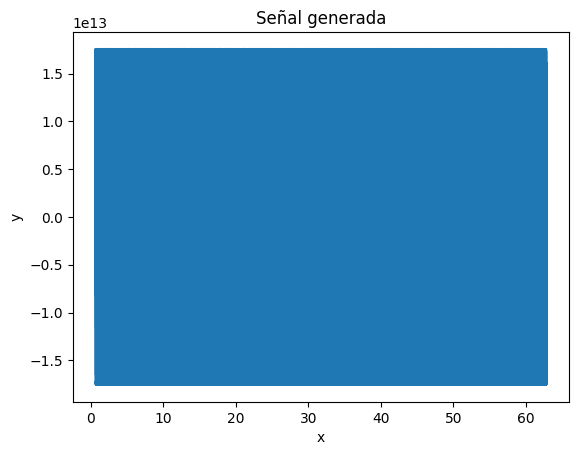

In [10]:
plt.plot(np.arange(x_min, 20 * math.pi, 0.001), long_s)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Señal generada')
plt.show()

Se reproduce la señal

In [1]:
sd.play(long_s)

NameError: name 'sd' is not defined